# The Cobweb Model

The cobweb model is a model of prices and quantities in a given market --- let's say, a market for soy beans.

The model dates back to the 1930s [add references] 

Although the model is quite old and rather simple, it helps build economic understanding because of its focus on expectations.

One aspect of the model is that soy beans cannot be produced instantaneously.

Due to this "production lag", sellers need to forecast the prices they expect to hold when their soy beans are ready to take to the market.

This informational friction can cause complicated dynamics.

Here we investigate and simulate the basic model under different assumptions regarding the way that produces form expectations.

Our discussion and simulations draw on [high quality lectures](https://comp-econ.org/CEF_2013/downloads/Complex%20Econ%20Systems%20Lecture%20II.pdf) by [Cars Hommes](https://www.uva.nl/en/profile/h/o/c.h.hommes/c.h.hommes.html).

We will use the following imports:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Model

Suppose demand for soy beans is given by

$$
    D(p_t) = a - b p_t
$$

where $a, b$ are nonnegative constants and $p_t$ is the spot (i.e, current market) price at time $t$.

($D(p_t)$ is the quantity demanded in some fixed unit, such as thousands of tons.)

Supply of soy beans depends on *expected* prices at time $t$, which we denote $p^e_t$.

We suppose that supply is nonlinear in expected prices, and takes the form

$$
    S(p^e_t) = \tanh(\lambda(p^e_t - c)) + d
$$

where $\lambda$ is a positive constant and $c, d \geq 0$.

Let's make a plot of supply and demand for particular choices of the parameter values.

We will store the parameters in a class and define the functions above as methods.

In [18]:
class Market:
    
    def __init__(self,
                 a=8,      # demand parameter
                 b=1,      # demand parameter
                 c=6,      # supply parameter
                 d=1,      # supply parameter
                 λ = 2.0): # supply parameter
        self.a, self.b, self.c, self.d = a, b, c, d
        self.λ = λ
    
    def demand(self, p):
        a, b = self.a, self.b
        return a - b * p
    
    def supply(self, p):
        c, d, λ = self.c, self.d, self.λ
        return np.tanh(λ * (p - c)) + d


Here's the plot.

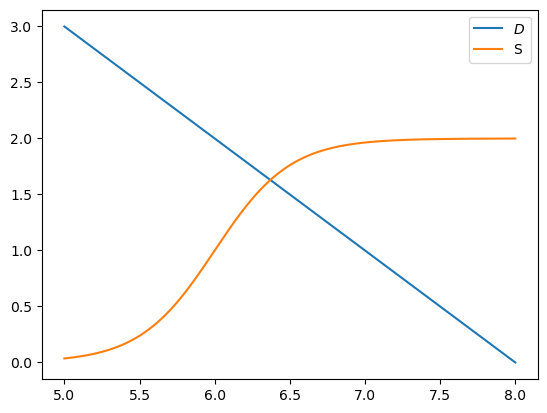

In [20]:
p_grid = np.linspace(5, 8, 200)
m = Market()
fig, ax = plt.subplots()

ax.plot(p_grid, m.demand(p_grid), label="$D$")
ax.plot(p_grid, m.supply(p_grid), label="S")
ax.legend()

plt.show()

Market equilibrium requires that supply equals demand, or

$$
    a - b p_t = S(p^e_t)
$$

Rewriting in terms of $p_t$ gives

$$
    p_t = - \frac{1}{b} [S(p^e_t) - a]
$$

Finally, to complete the model, we need to describe how price expectations are formed.

For now, let's just assume that expected prices at time $t$ depend on past prices.

In particular, we suppose that 

$$
    p^e_t = f(p_{t-1}, p_{t-2})
$$

where $f$ is some function.

Thus, we are assuming that producers expect the time-$t$ price to be some function of lagged prices, up to $2$ lags.

(We could of course add additional lags and readers are encouraged to experiment with such cases.)

Combining the last two equations gives the dynamics for prices:

$$
    p_t = - \frac{1}{b} [ S(f(p_{t-1}, p_{t-2}))) - a]
$$

The price dynamics depend on the parameter values and also on the function $f$ that tells us how producers form expectations.



## Naive Expectations

Naive expectations refers to the case where producers expect the next period spot price to be whatever the price is in the current period.

In other words,

$$ p_t^e = p_{t-1} $$

TODO Simulate and discuss.  Try to explain the dynamics as much as possible.  Use a 45 degree diagram.  

## Adaptive Expectations

Adaptive expectations refers to the case where producers form expectations for the next period price as a weighted average of their last guess and the current spot price.

That is,

$$ p_t^e = \alpha p_{t-1} + (1-\alpha) p^e_{t-1} $$

TODO Simulate and discuss.  Try to explain the dynamics as much as possible.  

## Exercises

Add some exercises and solutions.